### EXPLORATORY-DATA-ANALYSIS-GLASSDOR-DATA

In [1]:
## importing necceasry libraries  
import  numpy as np  
import matplotlib.pyplot as plt 
from matplotlib.image import imread
import seaborn as sns  
import pandas as pd     
sns.set_style("darkgrid")
plt.rcParams['figure.figsize']=20,6
plt.rcParams['figure.dpi']=400
# pd.set_option('display.max_columns',None)
# pd.options.plotting.backend = "plotly"
colors_diverging = sns.color_palette("RdBu", 10)
colors_qualitative = sns.color_palette("tab10", 10)
import plotly.express as px
import plotly.graph_objects as go
plotly_colors_qualitative = px.colors.qualitative
import re
import contractions
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud


In [2]:
## laoding the dataset  
glassdor_data= pd.read_csv(r"D:\python_data_analysis\datasets\glassdor_data_cleaned.csv")
## checking the first five  
glassdor_data.head()


Unnamed: 0                  Job Title Salary Estimate  \
0           0             Data Scientist          53-91    
1           1  Healthcare Data Scientist         63-112    
2           2             Data Scientist          80-90    
3           3             Data Scientist          56-97    
4           4             Data Scientist         86-143    

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters                    Size  Founded  ... Big Data  \
0      Goleta, CA   501 to 1000 employees     1973  ...        0   
1   Baltimore, MD        10000+ employees     1984  ...        0   
2  Clearwater, FL   501 to 1000 employees     2010  ...        1   
3    Richland, WA  1001 to 5000 employees     1965  ...        0   
4    New York, NY     51 to 200 employees     1998  ...        0   

  Machine Learning Deep Learning NLP Computer Vision  Time Series  \
0                1             0   0               0            0   
1                1             0   0               0            0   
2                1             0   0               0            0   
3                1             1   0               0            0   
4                1             0   0               0            0   

   Optimization  Job_Title_Cleaned  Seniority  Job_Description_Length  
0             0     Data Scientist     others                    2536  
1             1     Data Scientist     others                    4783  
2             1     Data Scientist     others                    3461  
3             0     Data Scientist     others                    3883  
4             0     Data Scientist     others                    2728  

[5 rows x 44 columns]

In [3]:
## dropping the columns we dont need  
glassdor_data = glassdor_data.drop(columns=['Unnamed: 0','Salary Estimate','Company Name','Location','Job Title'])
## checking the new data frame  
glassdor_data.head()

Job Description  Rating    Headquarters  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8      Goleta, CA   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   Baltimore, MD   
2  KnowBe4, Inc. is a high growth information sec...     4.8  Clearwater, FL   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8    Richland, WA   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9    New York, NY   

                     Size  Founded   Type of ownership  \
0   501 to 1000 employees     1973     Private Company   
1        10000+ employees     1984  Other Organization   
2   501 to 1000 employees     2010     Private Company   
3  1001 to 5000 employees     1965          Government   
4     51 to 200 employees     1998     Private Company   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  \
0         $50 to $100 million (USD)   
1            $2 to $5 billion (USD)   
2        $100 to $500 million (USD)   
3  $500 million to $1 billion (USD)   
4                           Unknown   

                                         Competitors  ...  Big Data  \
0                                                 -1  ...         0   
1                                                 -1  ...         0   
2                                                 -1  ...         1   
3  Oak Ridge National Laboratory, National Renewa...  ...         0   
4               Commerce Signals, Cardlytics, Yodlee  ...         0   

   Machine Learning  Deep Learning  NLP  Computer Vision Time Series  \
0                 1              0    0                0           0   
1                 1              0    0                0           0   
2                 1              0    0                0           0   
3                 1              1    0                0           0   
4                 1              0    0                0           0   

  Optimization Job_Title_Cleaned  Seniority  Job_Description_Length  
0            0    Data Scientist     others                    2536  
1            1    Data Scientist     others                    4783  
2            1    Data Scientist     others                    3461  
3            0    Data Scientist     others                    3883  
4            0    Data Scientist     others                    2728  

[5 rows x 39 columns]

In [4]:
## checking for missing values   
glassdor_data.isnull().sum()

Job Description               0
Rating                        0
Headquarters                  0
Size                          0
Founded                       0
Type of ownership             0
Industry                      0
Sector                        0
Revenue                       0
Competitors                   0
Hourly                        0
Employer_provided_salary      0
Min_Salary                    0
Max_Salary                    0
Average_Salary                0
Company_Name_Cleaned          0
Cities                        0
Job_States                    0
same_state                    0
Age                          50
Competitors_cleaned         460
Python                        0
R                             0
Spark                         0
AWS                           0
Excel                         0
SQL                           0
Tableau                       0
Hadoop                        0
Big Data                      0
Machine Learning              0
Deep Lea

In [5]:
## checking  for the percentage of missing values  
glassdor_data.isnull().mean()*100

Job Description              0.000000
Rating                       0.000000
Headquarters                 0.000000
Size                         0.000000
Founded                      0.000000
Type of ownership            0.000000
Industry                     0.000000
Sector                       0.000000
Revenue                      0.000000
Competitors                  0.000000
Hourly                       0.000000
Employer_provided_salary     0.000000
Min_Salary                   0.000000
Max_Salary                   0.000000
Average_Salary               0.000000
Company_Name_Cleaned         0.000000
Cities                       0.000000
Job_States                   0.000000
same_state                   0.000000
Age                          6.738544
Competitors_cleaned         61.994609
Python                       0.000000
R                            0.000000
Spark                        0.000000
AWS                          0.000000
Excel                        0.000000
SQL         

In [6]:
## checking for the duplicates  
glassdor_data.duplicated().sum()

np.int64(275)

###  EXPLORATORY-DATA-ANALYSIS

In [7]:
## checking for numeric  columns  
glassdor_data.select_dtypes(include=['int','float'])

Rating  Founded  Hourly  Employer_provided_salary  Min_Salary  \
0       3.8     1973       0                         0          53   
1       3.4     1984       0                         0          63   
2       4.8     2010       0                         0          80   
3       3.8     1965       0                         0          56   
4       2.9     1998       0                         0          86   
..      ...      ...     ...                       ...         ...   
737     3.9     1830       0                         0          58   
738     4.4     2006       0                         0          72   
739     2.6     1984       0                         0          56   
740     3.2       -1       0                         0          95   
741     3.6     1967       0                         0          61   

     Max_Salary  Average_Salary  same_state    Age  Competitors_cleaned  ...  \
0            91            72.0           0   52.0                  NaN  ...   
1           112            87.5           0   41.0                  NaN  ...   
2            90            85.0           1   15.0                  NaN  ...   
3            97            76.5           1   60.0                  3.0  ...   
4           143           114.5           1   27.0                  3.0  ...   
..          ...             ...         ...    ...                  ...  ...   
737         111            84.5           0  195.0                  3.0  ...   
738         133           102.5           0   19.0                  3.0  ...   
739          91            73.5           1   41.0                  NaN  ...   
740         160           127.5           0    NaN                  NaN  ...   
741         126            93.5           0   58.0                  NaN  ...   

     Tableau  Hadoop  Big Data  Machine Learning  Deep Learning  NLP  \
0          1       0         0                 1              0    0   
1          0       0         0                 1              0    0   
2          0       0         1                 1              0    0   
3          0       0         0                 1              1    0   
4          0       0         0                 1              0    0   
..       ...     ...       ...               ...            ...  ...   
737        0       0         0                 0              0    0   
738        0       1         1                 1              0    0   
739        0       0         0                 1              0    0   
740        0       0         0                 1              0    0   
741        0       0         0                 1              0    0   

     Computer Vision  Time Series  Optimization  Job_Description_Length  
0                  0            0             0                    2536  
1                  0            0             1                    4783  
2                  0            0             1                    3461  
3                  0            0             0                    3883  
4                  0            0             0                    2728  
..               ...          ...           ...                     ...  
737                0            0             0                    6162  
738                0            0             1                    6130  
739                0            0             0                    3078  
740                0            0             0                    1642  
741                0            0             0                    3673  

[742 rows x 26 columns]

In [8]:
## checking for the descriptive stats  
glassdor_data.describe().T

count         mean          std    min     25%  \
Rating                    742.0     3.618868     0.801210   -1.0     3.3   
Founded                   742.0  1837.154987   497.183763   -1.0  1939.0   
Hourly                    742.0     0.032345     0.177034    0.0     0.0   
Employer_provided_salary  742.0     0.022911     0.149721    0.0     0.0   
Min_Salary                742.0    74.068733    31.869282   10.0    52.0   
Max_Salary                742.0   127.183288    46.909006   16.0    96.0   
Average_Salary            742.0   100.626011    38.855948   13.5    73.5   
same_state                742.0     0.557951     0.496965    0.0     0.0   
Age                       692.0    55.030347    54.089762    6.0    18.0   
Competitors_cleaned       282.0     2.773050     0.518261    1.0     3.0   
Python                    742.0     0.528302     0.499535    0.0     0.0   
R                         742.0     0.002695     0.051882    0.0     0.0   
Spark                     742.0     0.225067     0.417908    0.0     0.0   
AWS                       742.0     0.237197     0.425651    0.0     0.0   
Excel                     742.0     0.522911     0.499812    0.0     0.0   
SQL                       742.0     0.512129     0.500190    0.0     0.0   
Tableau                   742.0     0.199461     0.399865    0.0     0.0   
Hadoop                    742.0     0.167116     0.373331    0.0     0.0   
Big Data                  742.0     0.184636     0.388264    0.0     0.0   
Machine Learning          742.0     0.424528     0.494605    0.0     0.0   
Deep Learning             742.0     0.084906     0.278929    0.0     0.0   
NLP                       742.0     0.053908     0.225989    0.0     0.0   
Computer Vision           742.0     0.044474     0.206286    0.0     0.0   
Time Series               742.0     0.033693     0.180559    0.0     0.0   
Optimization              742.0     0.154987     0.362136    0.0     0.0   
Job_Description_Length    742.0  3869.545822  1521.495868  407.0  2801.0   

                             50%     75%      max  
Rating                       3.7     4.0      5.0  
Founded                   1988.0  2007.0   2019.0  
Hourly                       0.0     0.0      1.0  
Employer_provided_salary     0.0     0.0      1.0  
Min_Salary                  69.5    91.0    202.0  
Max_Salary                 124.0   155.0    306.0  
Average_Salary              97.5   122.5    254.0  
same_state                   1.0     1.0      1.0  
Age                         33.0    67.0    281.0  
Competitors_cleaned          3.0     3.0      4.0  
Python                       1.0     1.0      1.0  
R                            0.0     0.0      1.0  
Spark                        0.0     0.0      1.0  
AWS                          0.0     0.0      1.0  
Excel                        1.0     1.0      1.0  
SQL                          1.0     1.0      1.0  
Tableau                      0.0     0.0      1.0  
Hadoop                       0.0     0.0      1.0  
Big Data                     0.0     0.0      1.0  
Machine Learning             0.0     1.0      1.0  
Deep Learning                0.0     0.0      1.0  
NLP                          0.0     0.0      1.0  
Computer Vision              0.0     0.0      1.0  
Time Series                  0.0     0.0      1.0  
Optimization                 0.0     0.0      1.0  
Job_Description_Length    3731.0  4740.0  10051.0

In [9]:
## checcking for the categorical columns 
glassdor_data.describe(include=['object']).T

count unique  \
Job Description        742    463   
Headquarters           742    198   
Size                   742      9   
Type of ownership      742     10   
Industry               742     60   
Sector                 742     25   
Revenue                742     13   
Competitors            742    128   
Company_Name_Cleaned   742    343   
Cities                 742    195   
Job_States             742     37   
Job_Title_Cleaned      742      9   
Seniority              742      3   

                                                                    top freq  
Job Description       Description\nMedical Laboratory Scientist - Te...    4  
Headquarters                                               New York, NY   52  
Size                                             1001 to 5000 employees  150  
Type of ownership                                       Private Company  410  
Industry                                      Biotech & Pharmaceuticals  112  
Sector                                           Information Technology  180  
Revenue                                                         Unknown  204  
Competitors                                                          -1  460  
Company_Name_Cleaned                                         MassMutual   14  
Cities                                                         New York   55  
Job_States                                                           CA  152  
Job_Title_Cleaned                                        Data Scientist  279  
Seniority                                                        others  519

### UNDERSTANDING-DATA-DISTRIBUTIONS

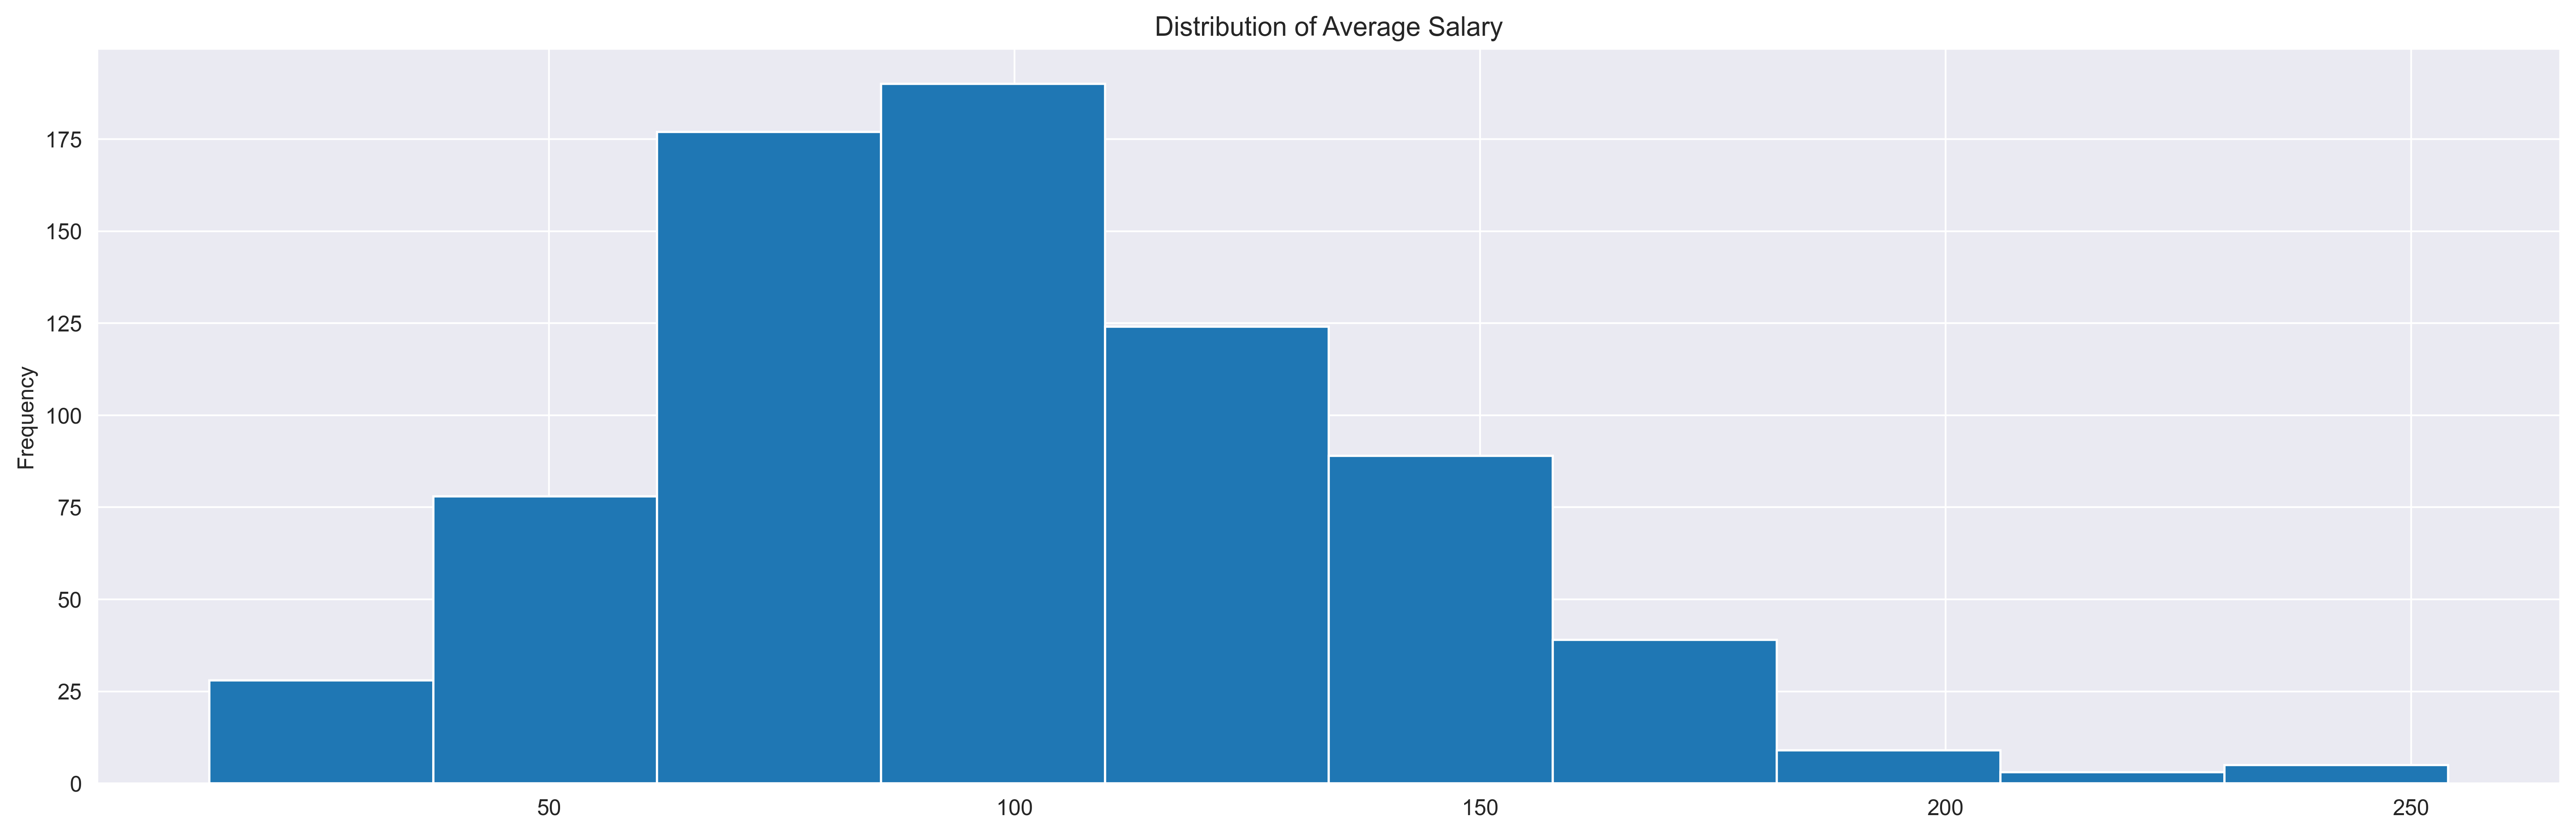

In [10]:
## understanding the distributions of numeric  columns
glassdor_data['Average_Salary'].plot.hist()
plt.title("Distribution of Average Salary")
plt.show()


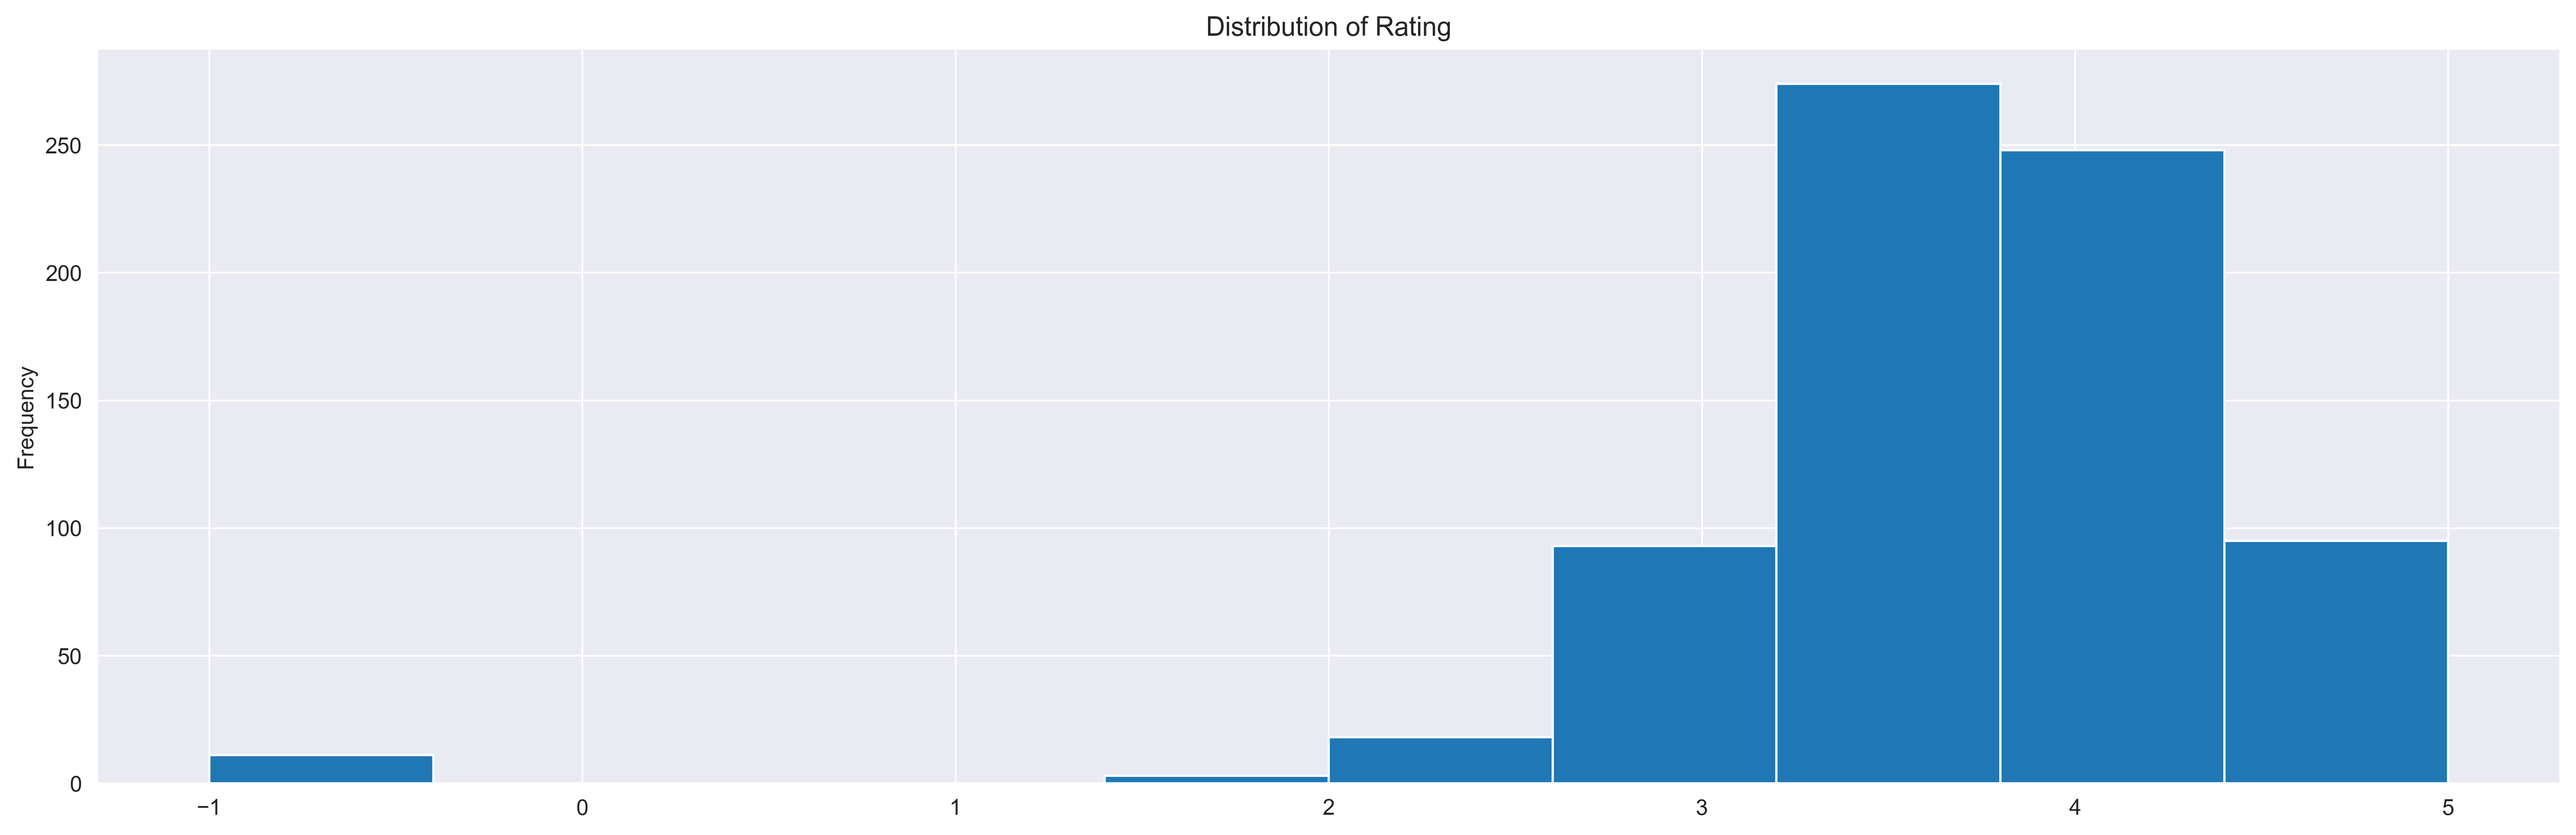

In [11]:
## Distribution of Rating column  
glassdor_data['Rating'].plot.hist()
plt.title("Distribution of Rating")
plt.show()


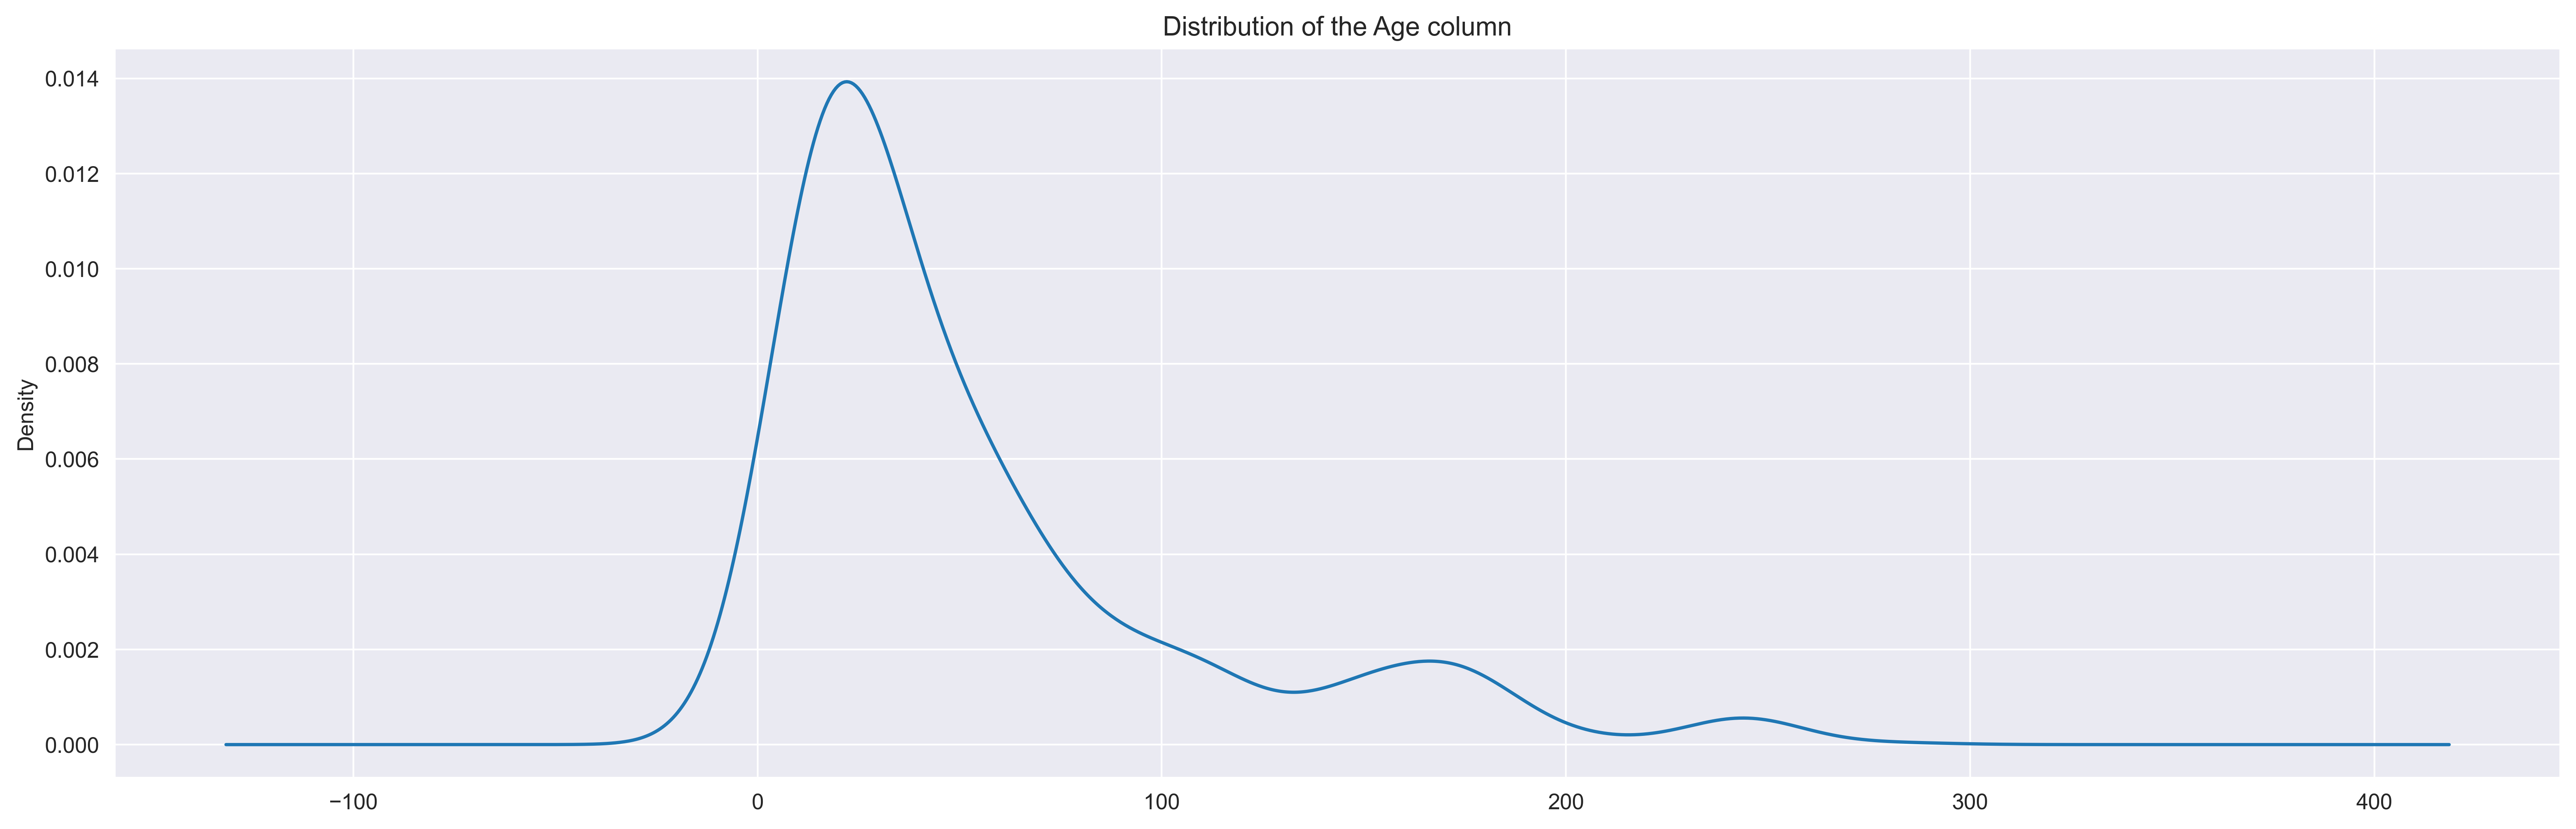

In [12]:
## Distribution of Age 
glassdor_data['Age'].plot.kde()
plt.title("Distribution of the Age column")
plt.show()

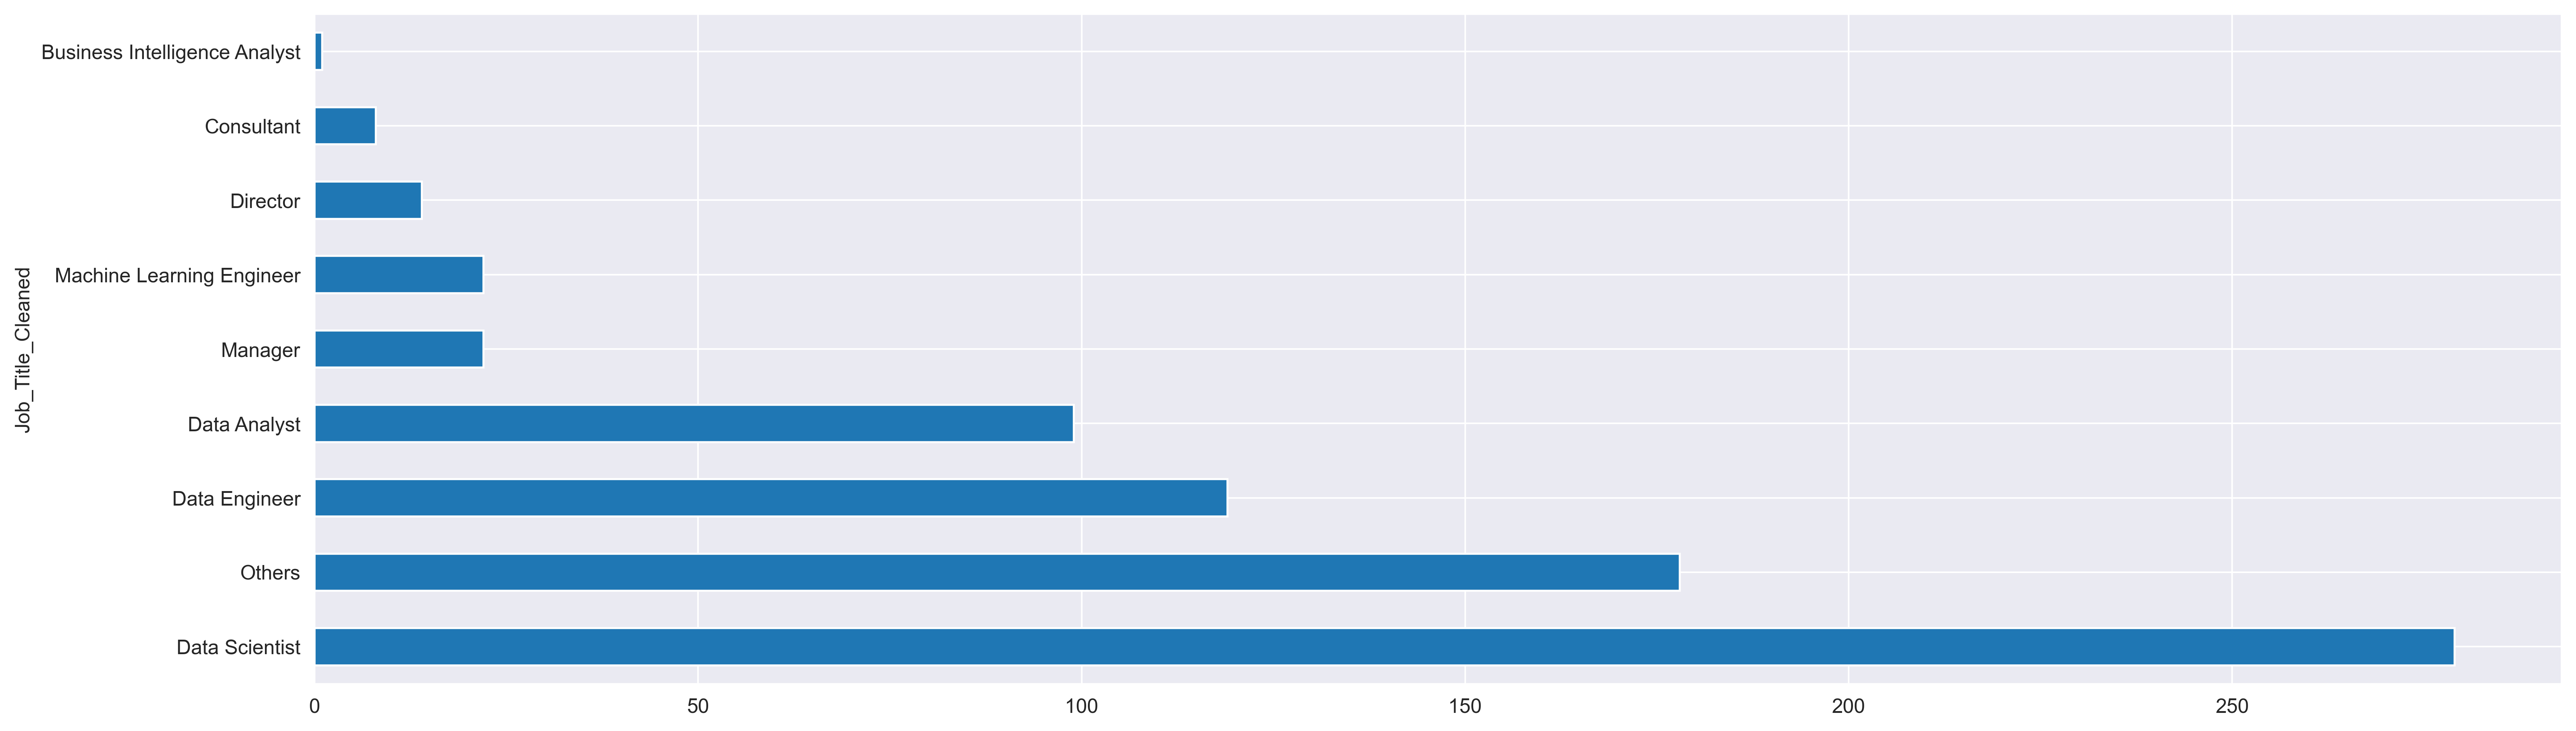

In [13]:
## plotting the barplot for  Job title cleaned  
glassdor_data['Job_Title_Cleaned'].value_counts().plot.barh()
plt.show() 

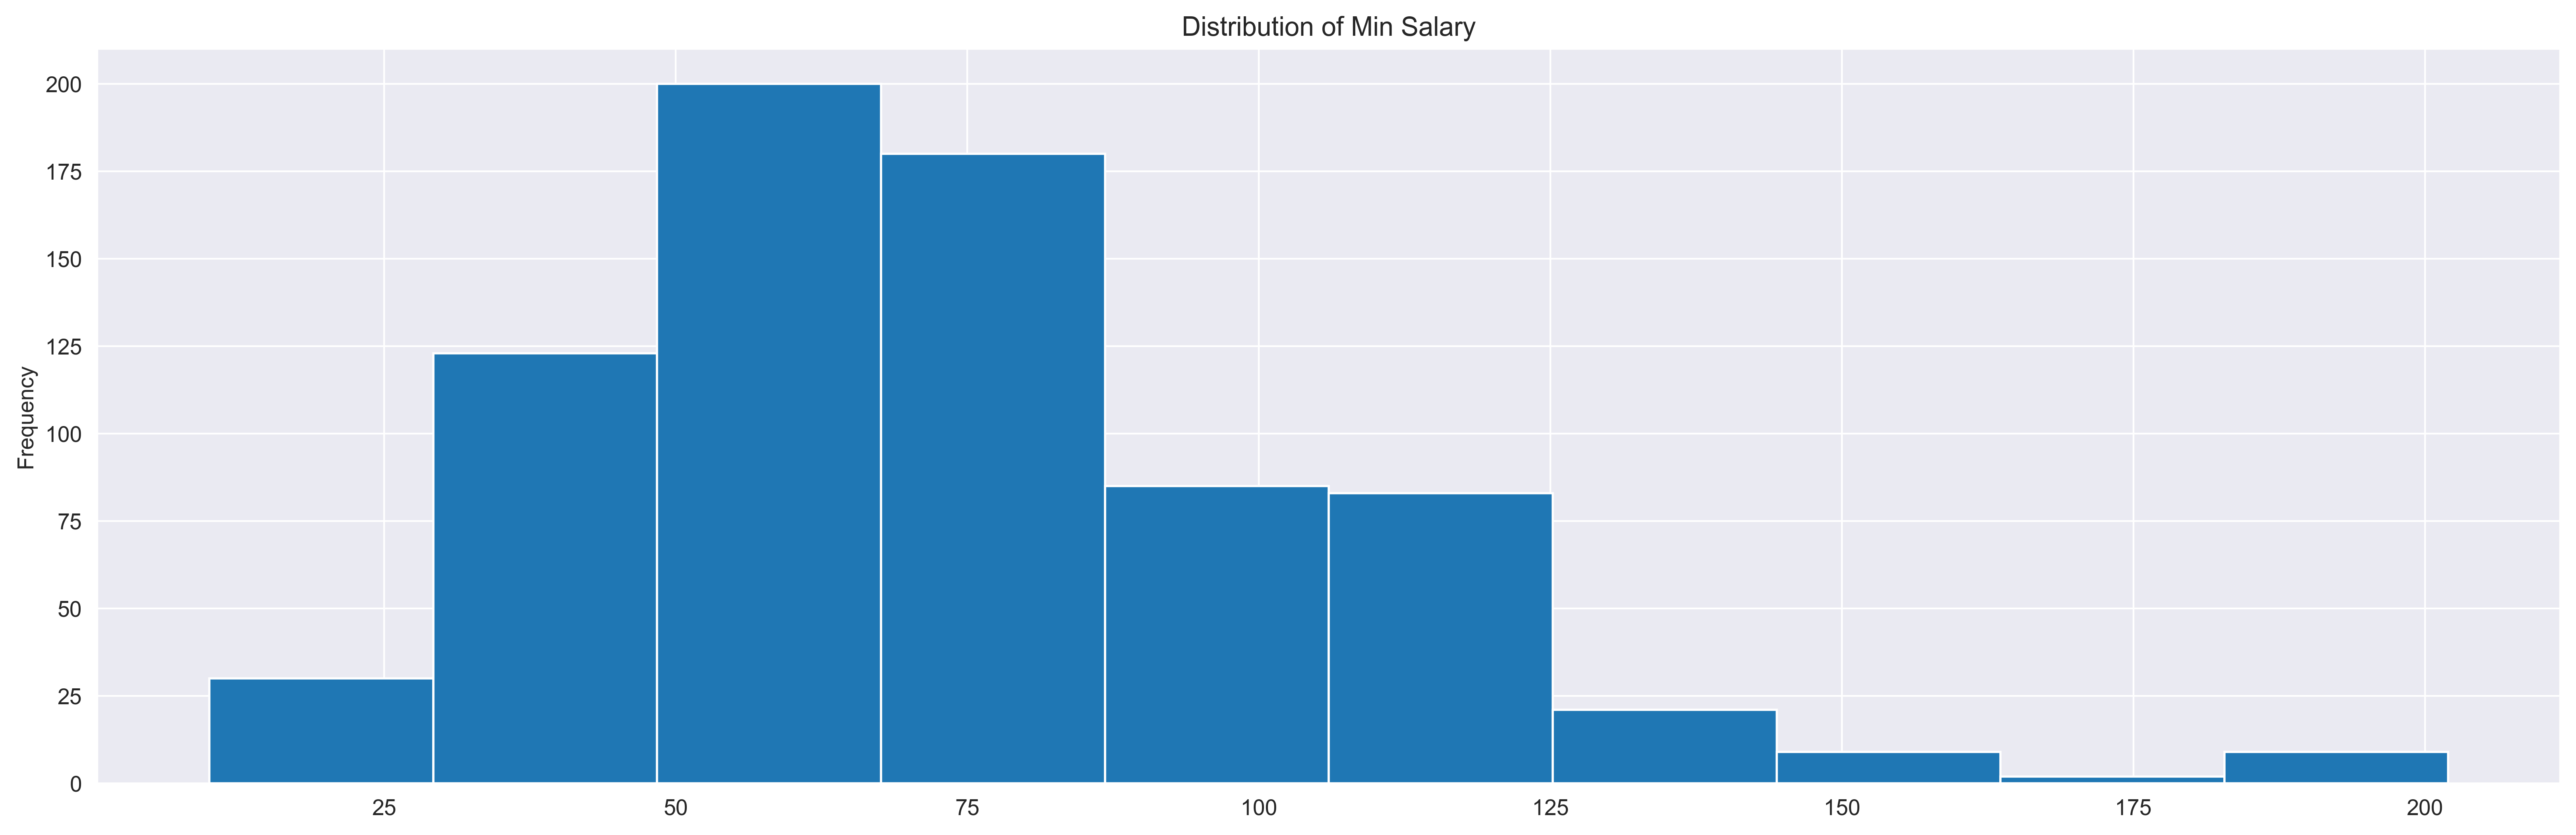

In [14]:
## distribution for min salary
glassdor_data['Min_Salary'].plot.hist()
plt.title("Distribution of Min Salary")
plt.show()

## Box-Plots-for-outliers

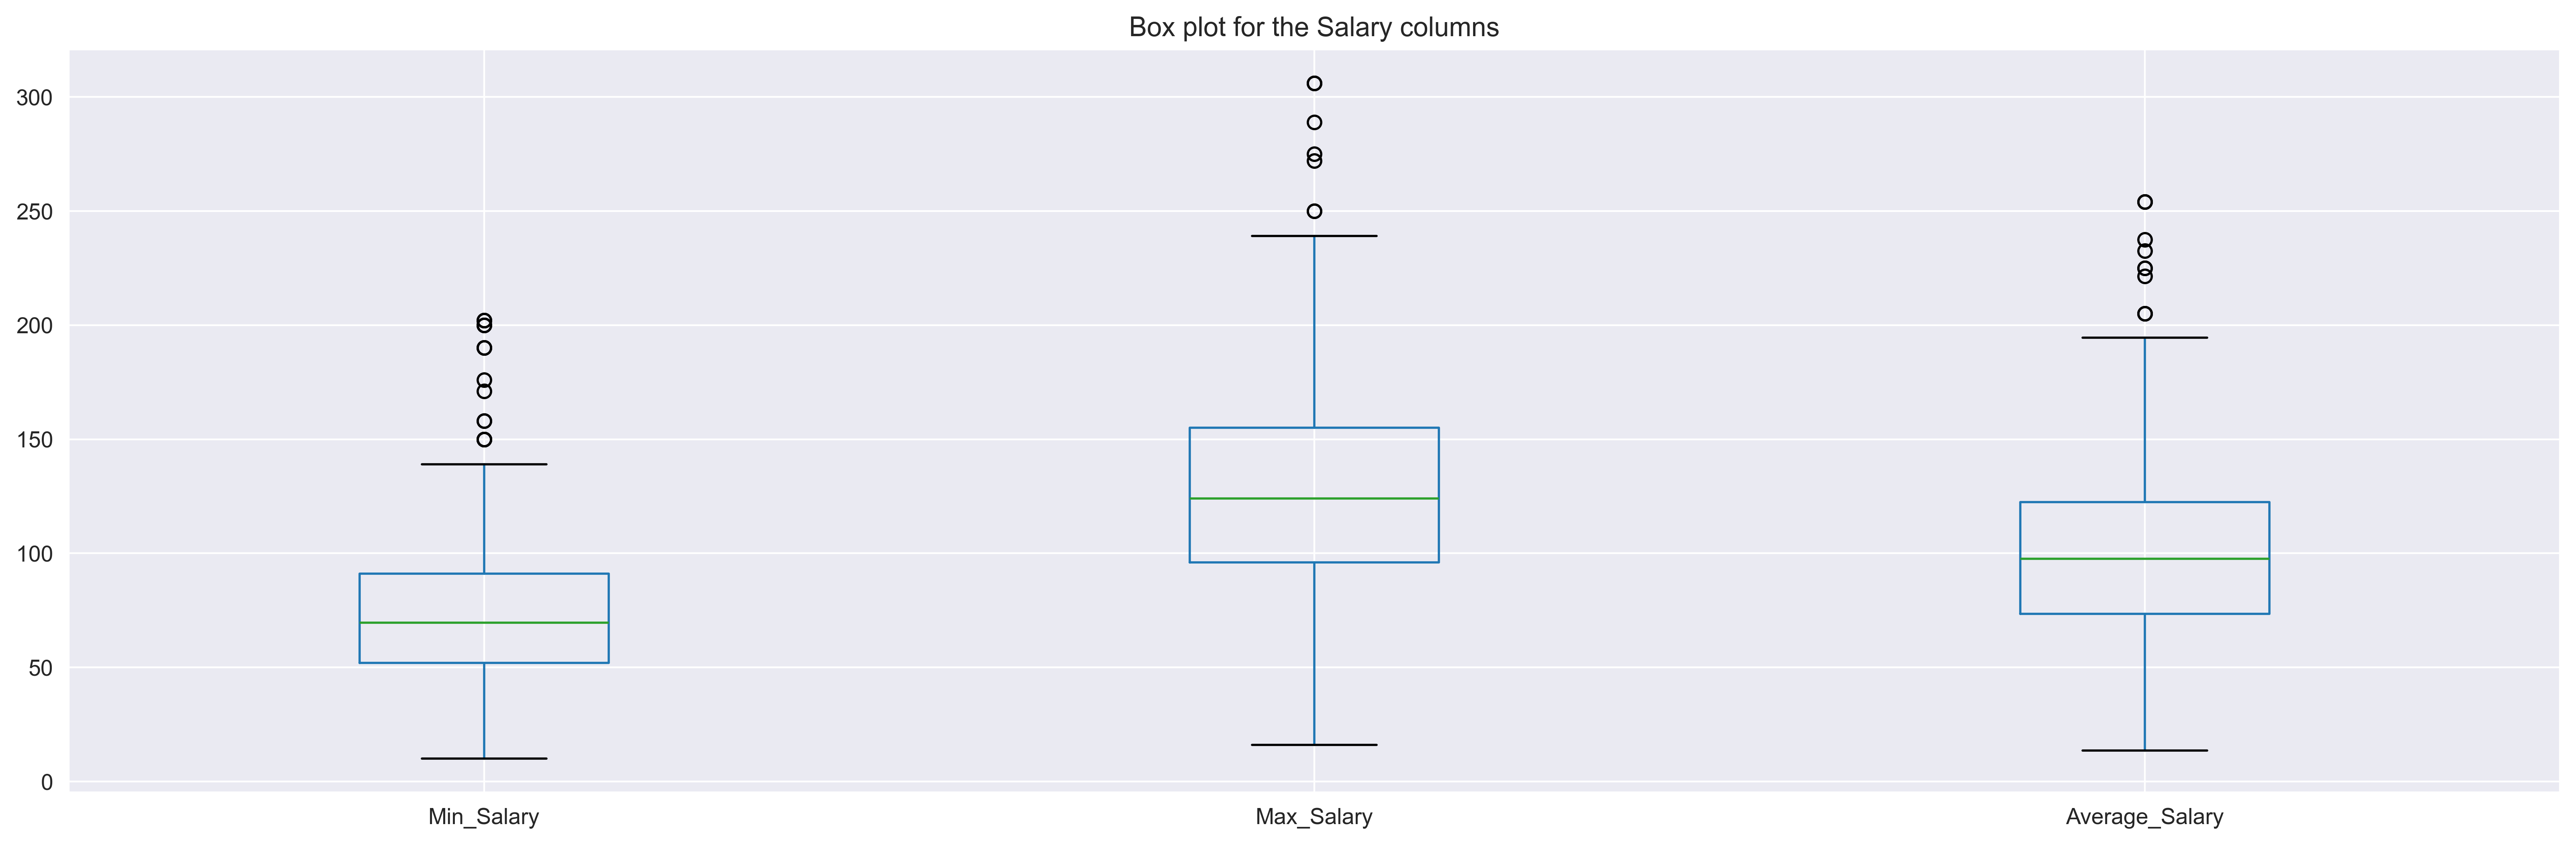

In [15]:
##creating box defined variables 
glassdor_data.boxplot(column=['Min_Salary','Max_Salary','Average_Salary'])
plt.title("Box plot for the Salary columns")
plt.show()

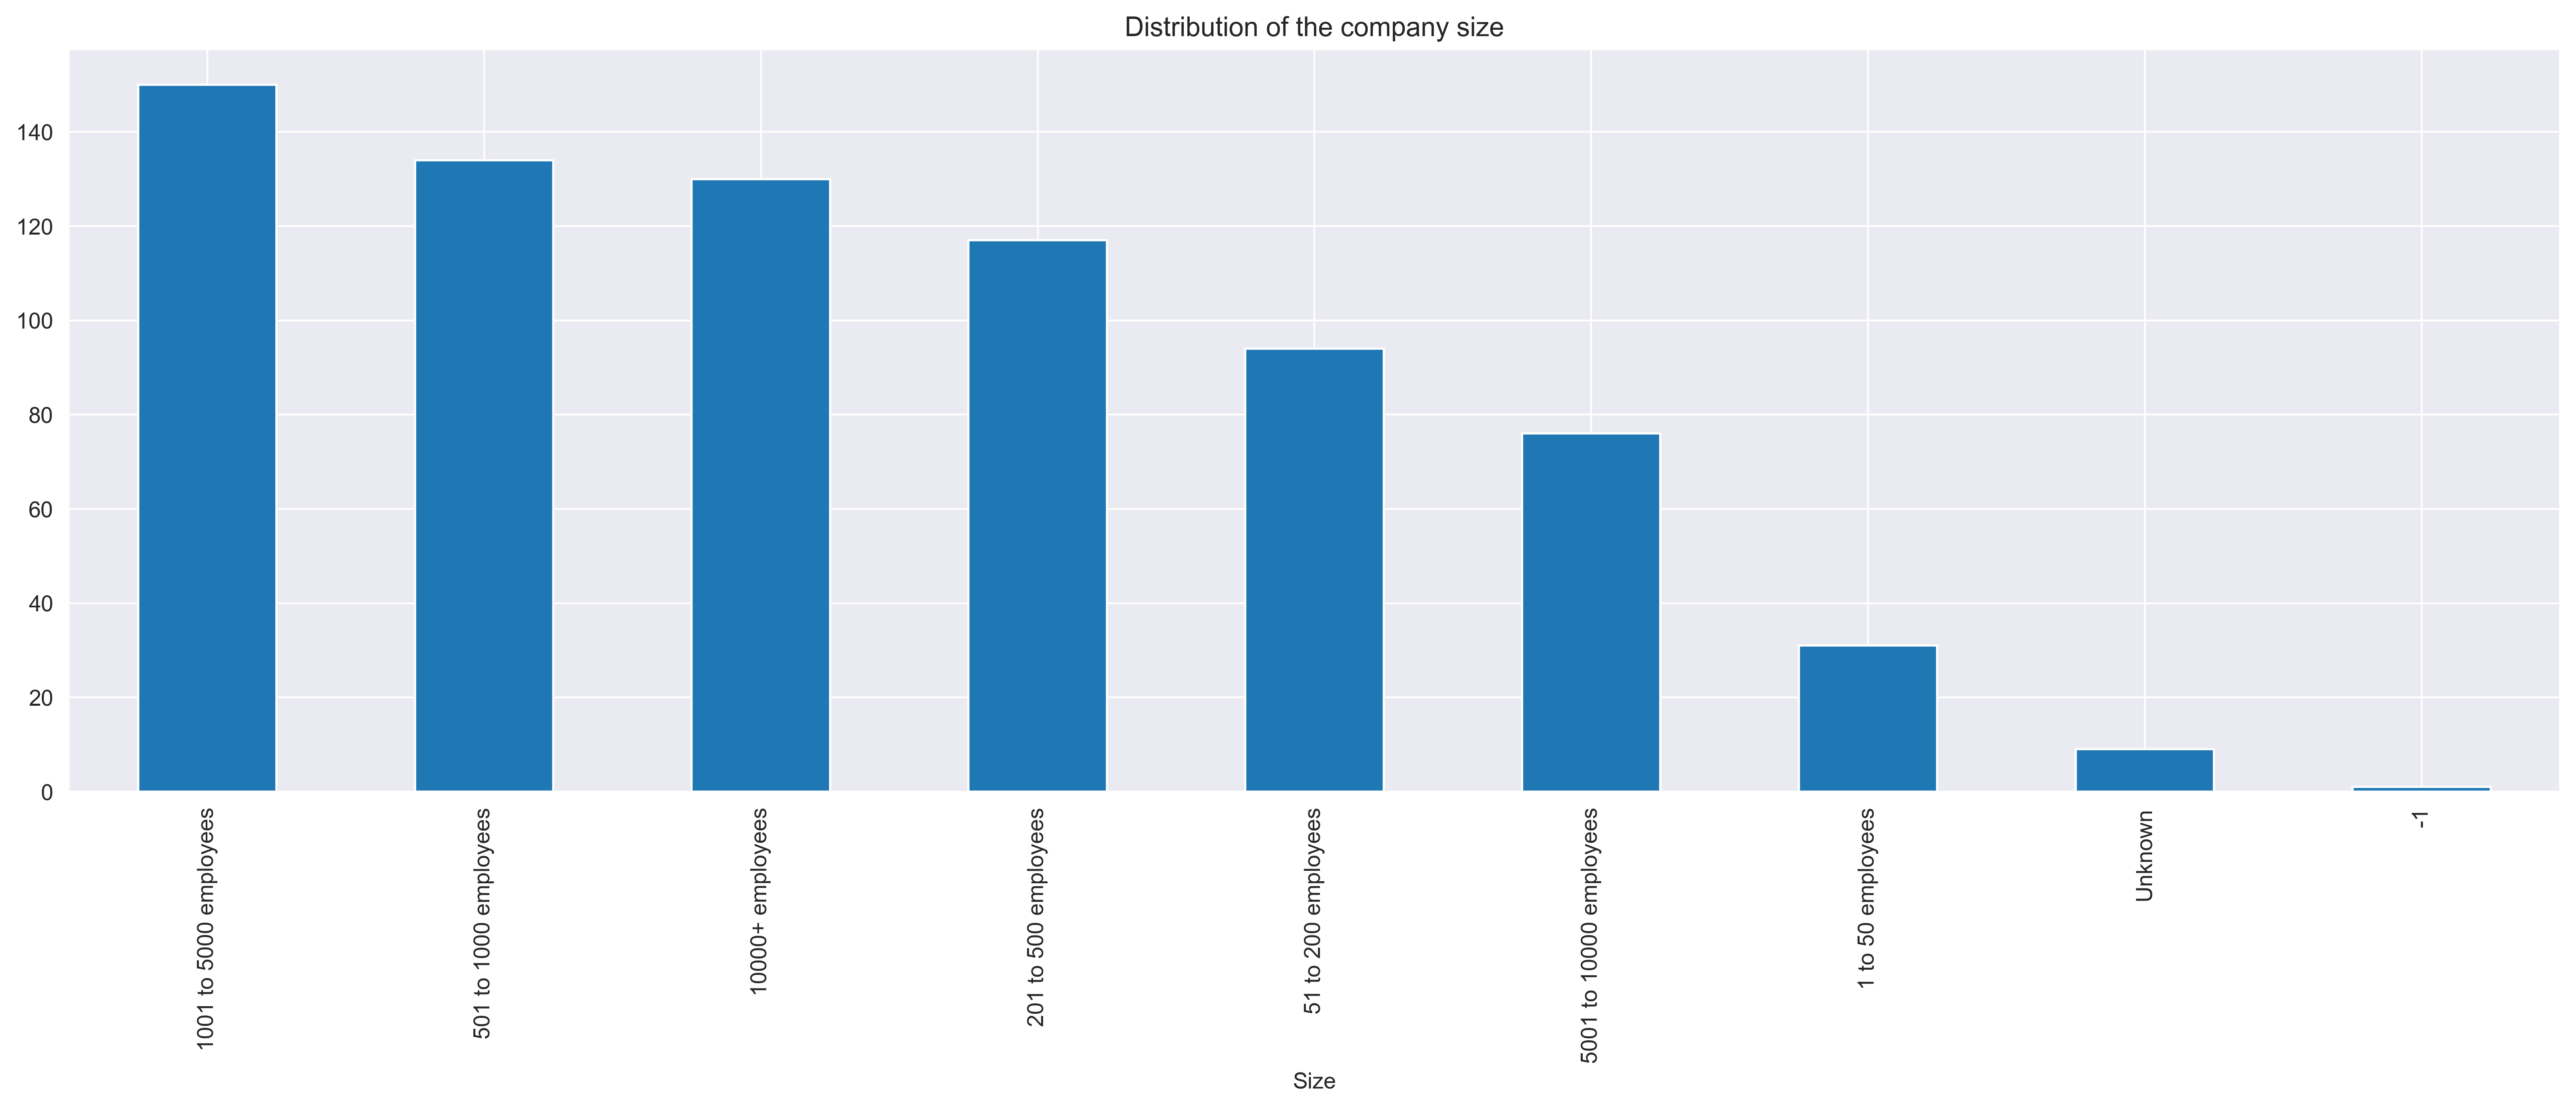

In [16]:
## checking for the distribution of the company size
glassdor_data['Size'].value_counts().plot.bar()
plt.title("Distribution of the company size")
plt.show()

### PIVOT-TABLES-FOR-EDA

In [17]:
## grouping job title cleaned and average salary
pd.pivot_table(glassdor_data,index='Job_Title_Cleaned',values='Average_Salary').sort_values('Average_Salary',ascending=False)

Average_Salary
Job_Title_Cleaned                            
Director                           168.607143
Machine Learning Engineer          126.431818
Data Scientist                     117.564516
Data Engineer                      105.403361
Others                              85.955056
Manager                             84.022727
Business Intelligence Analyst       79.000000
Consultant                          69.250000
Data Analyst                        64.621212

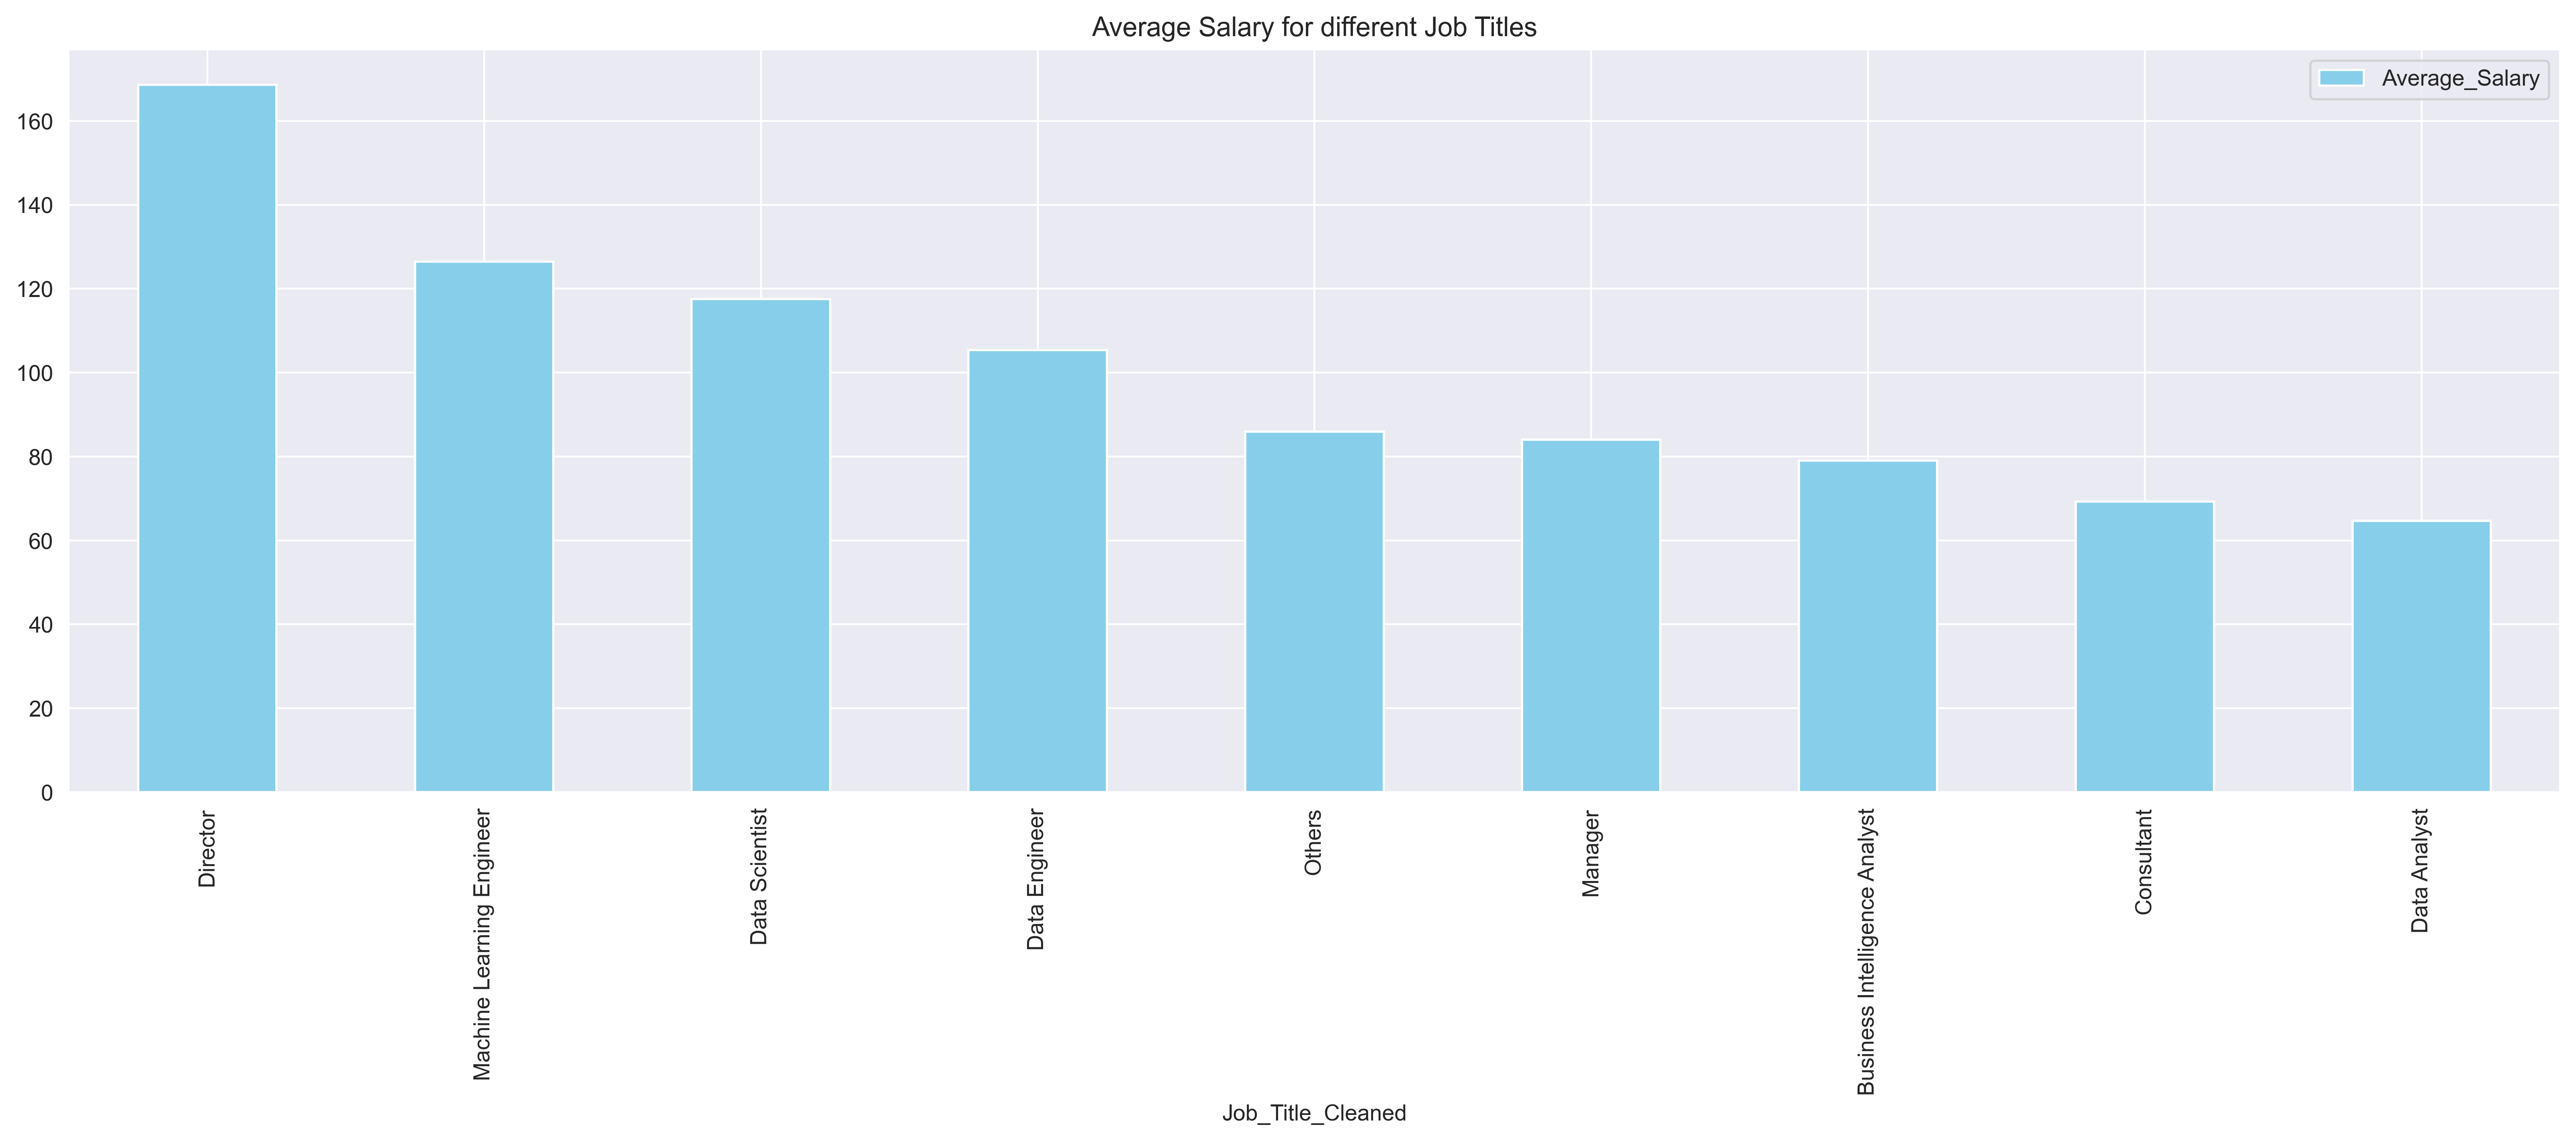

In [18]:
## plotting the results
pd.pivot_table(glassdor_data,index='Job_Title_Cleaned',values='Average_Salary').sort_values('Average_Salary',ascending=False).plot.bar(color='skyblue')
plt.title("Average Salary for different Job Titles")
plt.show()

In [19]:
## grouping job title cleaned,seniority and average salary
pd.pivot_table(glassdor_data,index=['Job_Title_Cleaned','Seniority'],values='Average_Salary').sort_values('Average_Salary',ascending=False)

Average_Salary
Job_Title_Cleaned             Seniority                
Director                      others         168.607143
Machine Learning Engineer     Senior         142.071429
Data Scientist                Senior         138.956522
Data Engineer                 Senior         124.689189
Machine Learning Engineer     others         119.133333
Others                        Senior         110.163793
Data Scientist                others         107.043011
                              Junior         106.500000
Data Engineer                 others          96.701220
Manager                       others          84.022727
Business Intelligence Analyst others          79.000000
Data Analyst                  Senior          75.480769
Others                        others          74.254167
Consultant                    others          69.250000
Data Analyst                  others          60.964789
                              Junior          53.250000

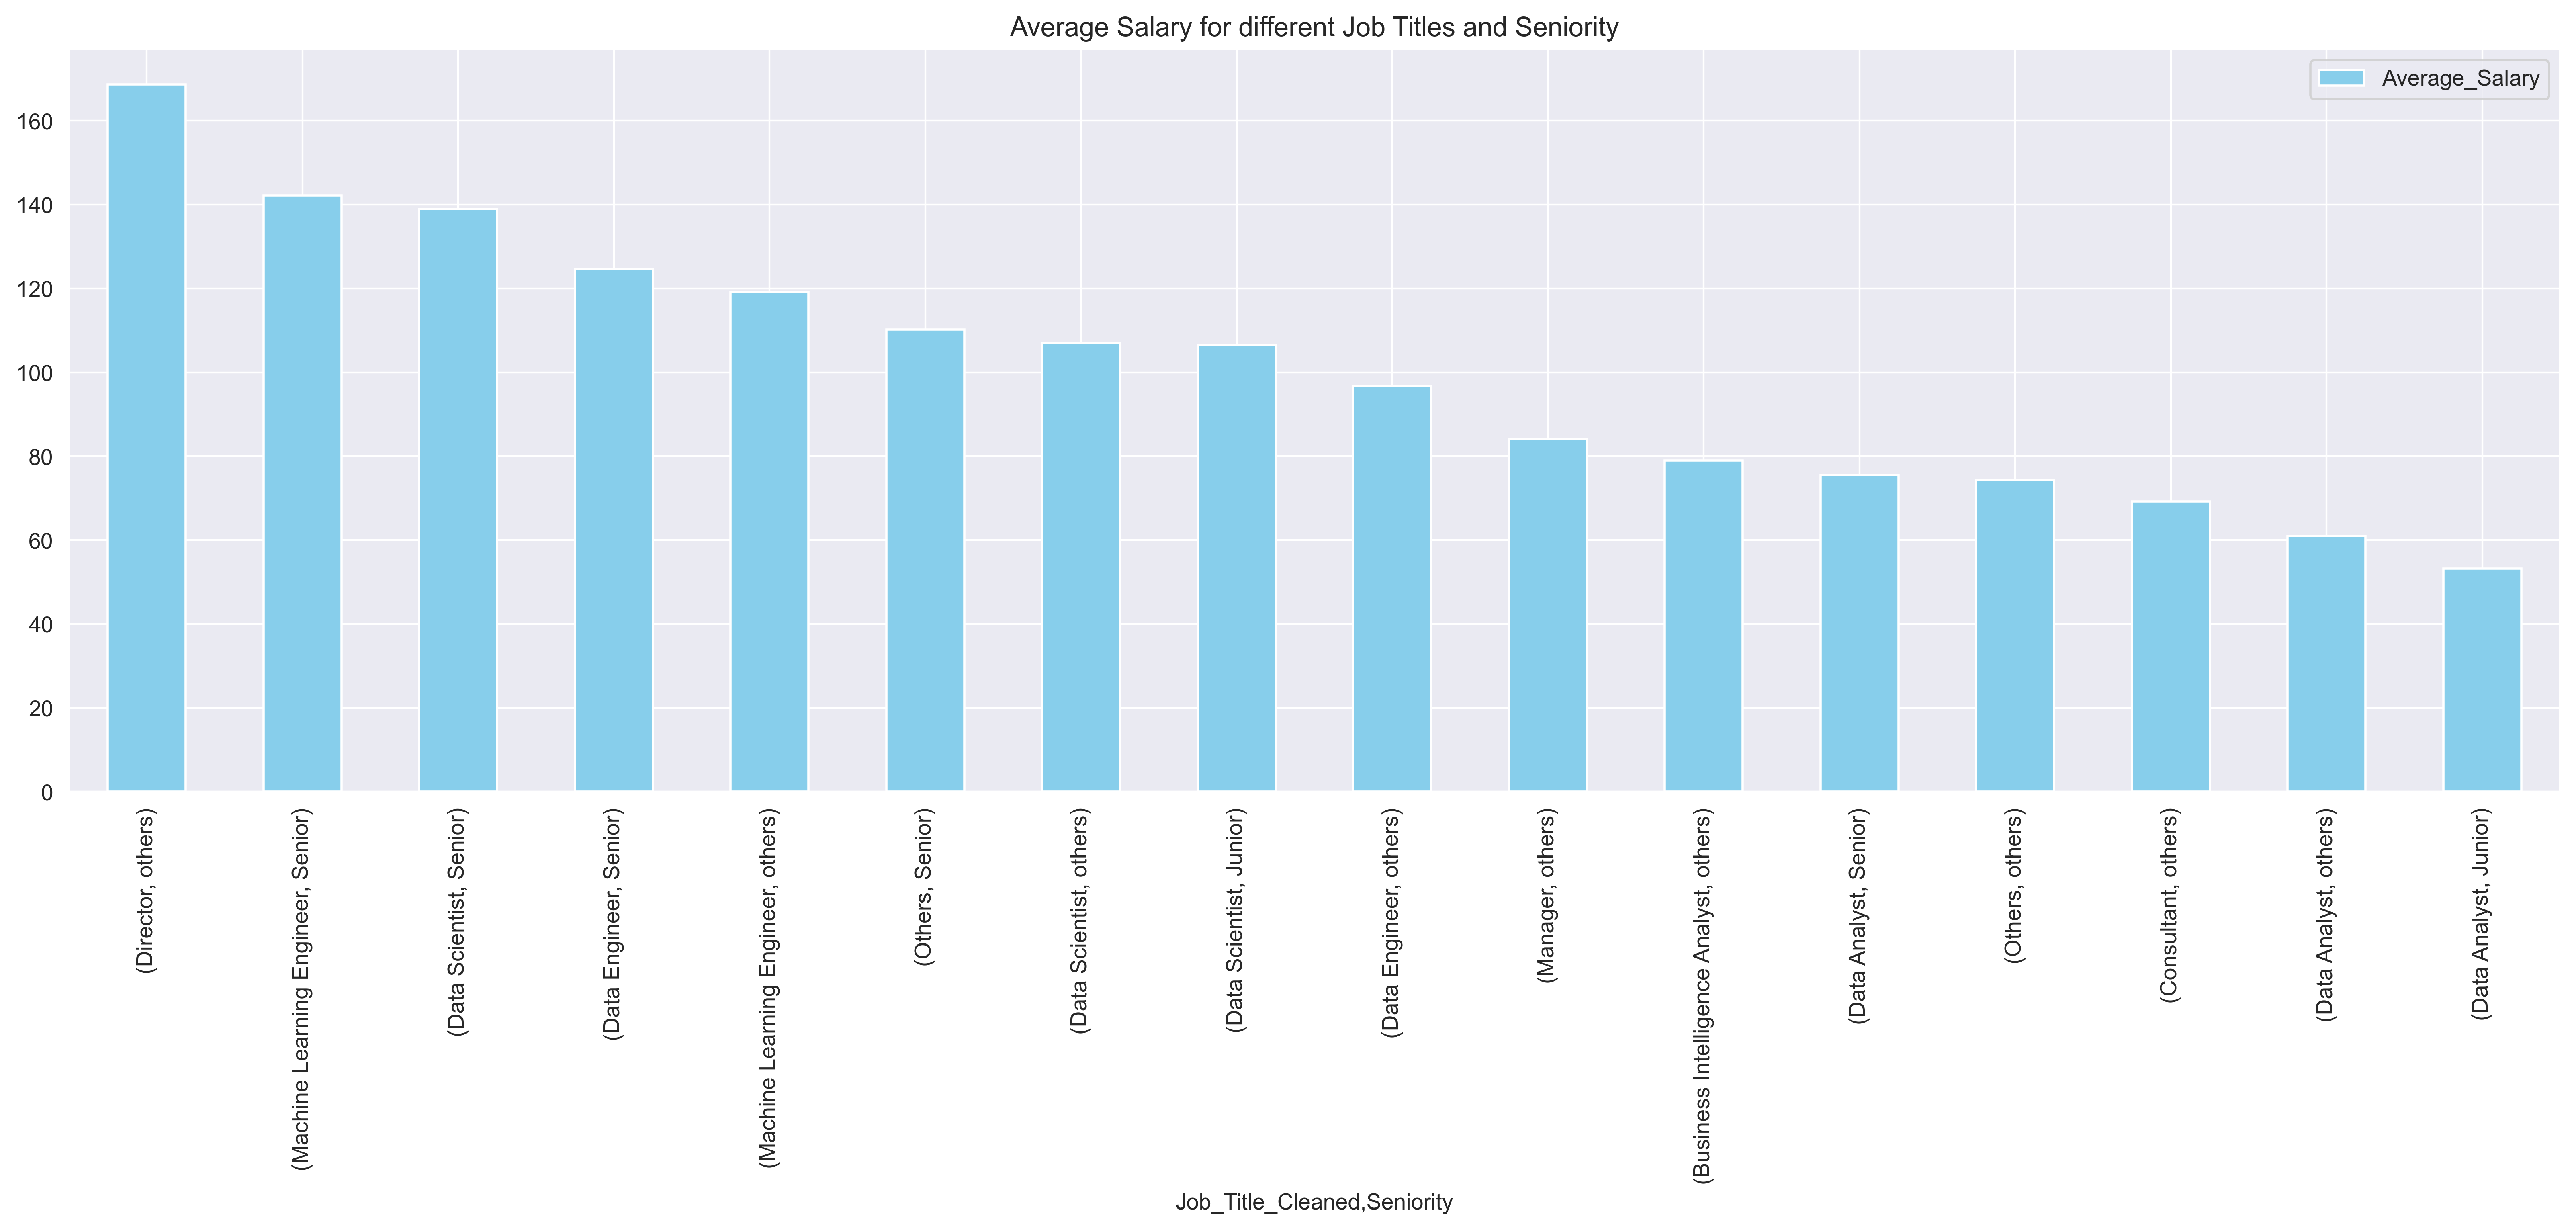

In [20]:
## plotting the results
pd.pivot_table(glassdor_data,index=['Job_Title_Cleaned','Seniority'],values='Average_Salary').sort_values('Average_Salary',ascending=False).plot.bar(color='skyblue')
plt.title("Average Salary for different Job Titles and Seniority")
plt.show()

In [21]:
## grouping by job state and average salary 
pd.pivot_table(glassdor_data,index='Job_States',values='Average_Salary').sort_values('Average_Salary',ascending=False)

Average_Salary
Job_States                
CA              123.513158
IL              116.662500
DC              110.181818
MA              106.281553
NJ              104.558824
MI              100.250000
RI              100.000000
NY               98.652778
NC               98.452381
MD               97.357143
KY               97.000000
VA               95.621951
UT               94.150000
WA               93.190476
PA               92.560606
OR               92.125000
IN               90.300000
TX               89.392857
OH               87.571429
TN               87.115385
KS               87.000000
AZ               85.666667
MN               85.500000
MO               84.722222
GA               80.666667
IA               78.900000
FL               77.625000
CO               77.045455
NM               74.333333
WI               73.300000
CT               71.100000
SC               60.500000
AL               57.937500
ID               56.250000
LA               52.250000
NE               41.000000
DE               27.500000

In [22]:
## grouping by job state  and average salary 
pd.set_option('display.max_rows',None)
pd.pivot_table(glassdor_data,index=['Job_States','Job_Title_Cleaned'],values='Average_Salary',aggfunc='count').sort_values('Job_States',ascending=False)

Average_Salary
Job_States Job_Title_Cleaned                            
WI         Others                                      4
           Data Scientist                              3
           Data Analyst                                3
WA         Others                                      1
           Data Scientist                             17
           Data Analyst                                3
VA         Others                                      5
           Machine Learning Engineer                   2
           Data Scientist                             18
           Data Engineer                              10
           Data Analyst                                6
UT         Data Engineer                               3
           Data Analyst                                4
           Data Scientist                              3
TX         Others                                      7
           Data Scientist                             13
           Data Engineer                               8
TN         Data Scientist                              1
           Data Engineer                              10
           Data Analyst                                2
SC         Others                                      1
RI         Data Analyst                                1
PA         Others                                      8
           Manager                                     3
           Machine Learning Engineer                   7
           Data Scientist                              6
           Data Engineer                               1
           Data Analyst                                8
OR         Data Engineer                               1
           Data Scientist                              3
OH         Data Scientist                              7
           Data Analyst                                3
           Business Intelligence Analyst               1
           Others                                      3
NY         Others                                     11
           Machine Learning Engineer                   2
           Data Scientist                             40
           Data Engineer                               4
           Data Analyst                               14
           Consultant                                  1
NM         Data Scientist                              3
NJ         Director                                    2
           Data Scientist                              4
           Data Analyst                                5
           Data Engineer                               2
           Manager                                     2
           Others                                      2
NE         Others                                      4
NC         Others                                     12
           Data Scientist                              3
           Data Engineer                               6
MO         Others                                      3
           Manager                                     1
           Data Scientist                              3
           Data Analyst                                2
MN         Data Analyst                                1
           Data Engineer                               1
MI         Data Scientist                              4
           Manager                                     2
MD         Others                                     16
           Data Scientist                             13
           Data Engineer                               3
           Data Analyst                                3
MA         Others                                     46
           Manager                                     5
           Director                                    6
           Data Scientist                             30
           Data Engineer                              12
           Data Analyst                             

In [23]:
## checking for the average salary for different job states and job titles
pd.set_option('display.max_rows',None)
pd.pivot_table(glassdor_data,index=['Job_States','Job_Title_Cleaned'],values='Average_Salary').sort_values('Average_Salary',ascending=False)

Average_Salary
Job_States Job_Title_Cleaned                            
IL         Director                           221.750000
CA         Machine Learning Engineer          177.300000
NJ         Director                           161.500000
DC         Data Scientist                     149.000000
CA         Data Scientist                     142.522059
UT         Data Scientist                     140.500000
IL         Machine Learning Engineer          133.000000
CA         Data Engineer                      129.540000
NJ         Others                             127.750000
MO         Data Scientist                     127.666667
NY         Machine Learning Engineer          125.000000
AZ         Others                             124.500000
PA         Machine Learning Engineer          120.500000
MA         Director                           117.833333
IL         Data Scientist                     117.233333
NC         Data Scientist                     117.000000
NY         Data Scientist                     115.250000
IN         Data Engineer                      114.500000
NY         Consultant                         114.500000
MA         Data Scientist                     113.750000
WI         Data Scientist                     113.500000
PA         Data Scientist                     113.333333
TX         Data Engineer                      113.062500
NJ         Data Engineer                      112.000000
PA         Manager                            109.666667
NJ         Manager                            109.500000
MD         Data Scientist                     109.115385
           Data Engineer                      109.000000
CO         Data Scientist                     108.666667
VA         Data Scientist                     108.416667
MA         Others                             107.478261
           Data Engineer                      107.291667
NJ         Data Scientist                     106.875000
MI         Data Scientist                     106.625000
OH         Data Scientist                     105.285714
NC         Data Engineer                      104.250000
KY         Others                             103.500000
IA         Data Engineer                      102.833333
CA         Others                             101.730769
TN         Data Engineer                      100.950000
TX         Data Scientist                     100.730769
CO         Machine Learning Engineer          100.500000
UT         Data Engineer                      100.333333
RI         Data Analyst                       100.000000
WA         Data Scientist                      99.764706
CO         Data Engineer                       99.000000
OR         Data Scientist                      98.500000
WA         Others                              97.500000
FL         Data Scientist                      97.357143
VA         Data Engineer                       96.900000
IL         Data Engineer                       96.125000
TN         Data Scientist                      96.000000
MN         Data Engineer                       95.000000
FL         Data Engineer                       91.833333
PA         Data Engineer                       91.500000
OH         Others                              91.166667
NC         Others                              90.916667
MD         Others                              88.750000
MI         Manager                             87.500000
VA         Machine Learning Engineer           87.000000
KS         Machine Learning Engineer           87.000000
NY         Data Engineer                       86.375000
CA         Data Analyst                        85.250000
DC         Data Engineer                       85.000000
IN         Data Scientist                      84.500000
KY         Data Scientist                      84.000000
CT         Data Scientist                      84.000000
GA         Data Scientist                      81.333333
MD         Data Analyst                        80.66

In [24]:
#### filtering the data based on only dataset
pd.pivot_table(glassdor_data[glassdor_data['Job_Title_Cleaned']=='Data Scientist'],index=['Job_States'],values='Average_Salary').sort_values('Average_Salary',ascending=False)


Average_Salary
Job_States                
DC              149.000000
CA              142.522059
UT              140.500000
MO              127.666667
IL              117.233333
NC              117.000000
NY              115.250000
MA              113.750000
WI              113.500000
PA              113.333333
MD              109.115385
CO              108.666667
VA              108.416667
NJ              106.875000
MI              106.625000
OH              105.285714
TX              100.730769
WA               99.764706
OR               98.500000
FL               97.357143
TN               96.000000
IN               84.500000
KY               84.000000
CT               84.000000
GA               81.333333
NM               74.333333
AZ               69.500000

In [25]:
## grouping by revenue and average salary
pd.pivot_table(glassdor_data,index=['Revenue'],columns='Python',values='Average_Salary',aggfunc='count')

Python                             0    1
Revenue                                  
$1 to $2 billion (USD)            16   44
$1 to $5 million (USD)             1    7
$10 to $25 million (USD)          16   16
$10+ billion (USD)                66   58
$100 to $500 million (USD)        47   44
$2 to $5 billion (USD)            17   22
$25 to $50 million (USD)          24   16
$5 to $10 billion (USD)            9   10
$5 to $10 million (USD)            9    9
$50 to $100 million (USD)         21   25
$500 million to $1 billion (USD)  29   28
Less than $1 million (USD)         1    3
Unknown                           94  110

In [26]:
## i want to know how job states require whther python or not
pd.pivot_table(glassdor_data,index=['Job_States'],columns='Python',values='Average_Salary',aggfunc='count')

Python         0     1
Job_States            
AL           4.0   4.0
AZ           3.0   6.0
CA          60.0  92.0
CO           4.0   7.0
CT           5.0   NaN
DC           7.0   4.0
DE           6.0   NaN
FL           5.0  11.0
GA           3.0   3.0
IA           3.0   2.0
ID           1.0   1.0
IL          12.0  28.0
IN           2.0   8.0
KS           NaN   3.0
KY           4.0   2.0
LA           4.0   NaN
MA          62.0  41.0
MD          23.0  12.0
MI           3.0   3.0
MN           1.0   1.0
MO           6.0   3.0
NC          13.0   8.0
NE           4.0   NaN
NJ           8.0   9.0
NM           NaN   3.0
NY          24.0  48.0
OH           7.0   7.0
OR           1.0   3.0
PA          19.0  14.0
RI           1.0   NaN
SC           1.0   NaN
TN           5.0   8.0
TX          13.0  15.0
UT           6.0   4.0
VA          10.0  31.0
WA          12.0   9.0
WI           8.0   2.0

In [27]:
## i want to know which job states require sql or not
pd.pivot_table(glassdor_data,index=['Job_States'],columns='SQL',values='Average_Salary',aggfunc='count')


SQL            0     1
Job_States            
AL           6.0   2.0
AZ           2.0   7.0
CA          64.0  88.0
CO           5.0   6.0
CT           5.0   NaN
DC           5.0   6.0
DE           6.0   NaN
FL           5.0  11.0
GA           3.0   3.0
IA           NaN   5.0
ID           NaN   2.0
IL          12.0  28.0
IN           4.0   6.0
KS           NaN   3.0
KY           4.0   2.0
LA           1.0   3.0
MA          64.0  39.0
MD          30.0   5.0
MI           1.0   5.0
MN           NaN   2.0
MO           1.0   8.0
NC          16.0   5.0
NE           4.0   NaN
NJ           5.0  12.0
NM           3.0   NaN
NY          27.0  45.0
OH           6.0   8.0
OR           NaN   4.0
PA          19.0  14.0
RI           NaN   1.0
SC           1.0   NaN
TN           5.0   8.0
TX          12.0  16.0
UT           6.0   4.0
VA          18.0  23.0
WA          15.0   6.0
WI           7.0   3.0

In [28]:
## i want to  know whether companies require aws or not
pd.pivot_table(glassdor_data,index=['Job_States'],columns='AWS',values='Average_Salary',aggfunc='count')

AWS             0     1
Job_States             
AL            7.0   1.0
AZ            8.0   1.0
CA          111.0  41.0
CO            7.0   4.0
CT            3.0   2.0
DC            6.0   5.0
DE            6.0   NaN
FL           12.0   4.0
GA            6.0   NaN
IA            5.0   NaN
ID            2.0   NaN
IL           30.0  10.0
IN            5.0   5.0
KS            3.0   NaN
KY            6.0   NaN
LA            4.0   NaN
MA           84.0  19.0
MD           32.0   3.0
MI            5.0   1.0
MN            1.0   1.0
MO            8.0   1.0
NC           17.0   4.0
NE            4.0   NaN
NJ           12.0   5.0
NM            3.0   NaN
NY           52.0  20.0
OH           12.0   2.0
OR            2.0   2.0
PA           28.0   5.0
RI            NaN   1.0
SC            1.0   NaN
TN            8.0   5.0
TX           14.0  14.0
UT            4.0   6.0
VA           32.0   9.0
WA           18.0   3.0
WI            8.0   2.0

### creating-world-cloud-for-job-description-column

In [29]:

# Initialize tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Step 1: Removing irrelevant characters
glassdor_data['Job_Description_Cleaned_2'] = glassdor_data['Job Description'].apply(
    lambda x: re.sub(r'[^a-zA-Z\s\']', '', x) 
)

# Step 2: Handling contractions
glassdor_data['Job_Description_Cleaned_2'] = glassdor_data['Job_Description_Cleaned_2'].apply(contractions.fix)

# Step 3: Convert to lowercase
glassdor_data['Job_Description_Cleaned_2'] = glassdor_data['Job_Description_Cleaned_2'].str.lower()

# Step 4: Tokenize
glassdor_data['Job_Description_Cleaned_2'] = glassdor_data['Job_Description_Cleaned_2'].apply(word_tokenize)

# Step 5: Lemmatize
glassdor_data['lemmatized_words'] = glassdor_data['Job_Description_Cleaned_2'].apply(
    lambda x: [lemmatizer.lemmatize(word) for word in x]
)

# Step 6: Remove stop words
glassdor_data['lemmatized_words'] = glassdor_data['lemmatized_words'].apply(
    lambda x: [word for word in x if word not in stop_words]
)

# Step 7: Join all words into a single string
all_words = ' '.join([word for sublist in glassdor_data['lemmatized_words'] for word in sublist])


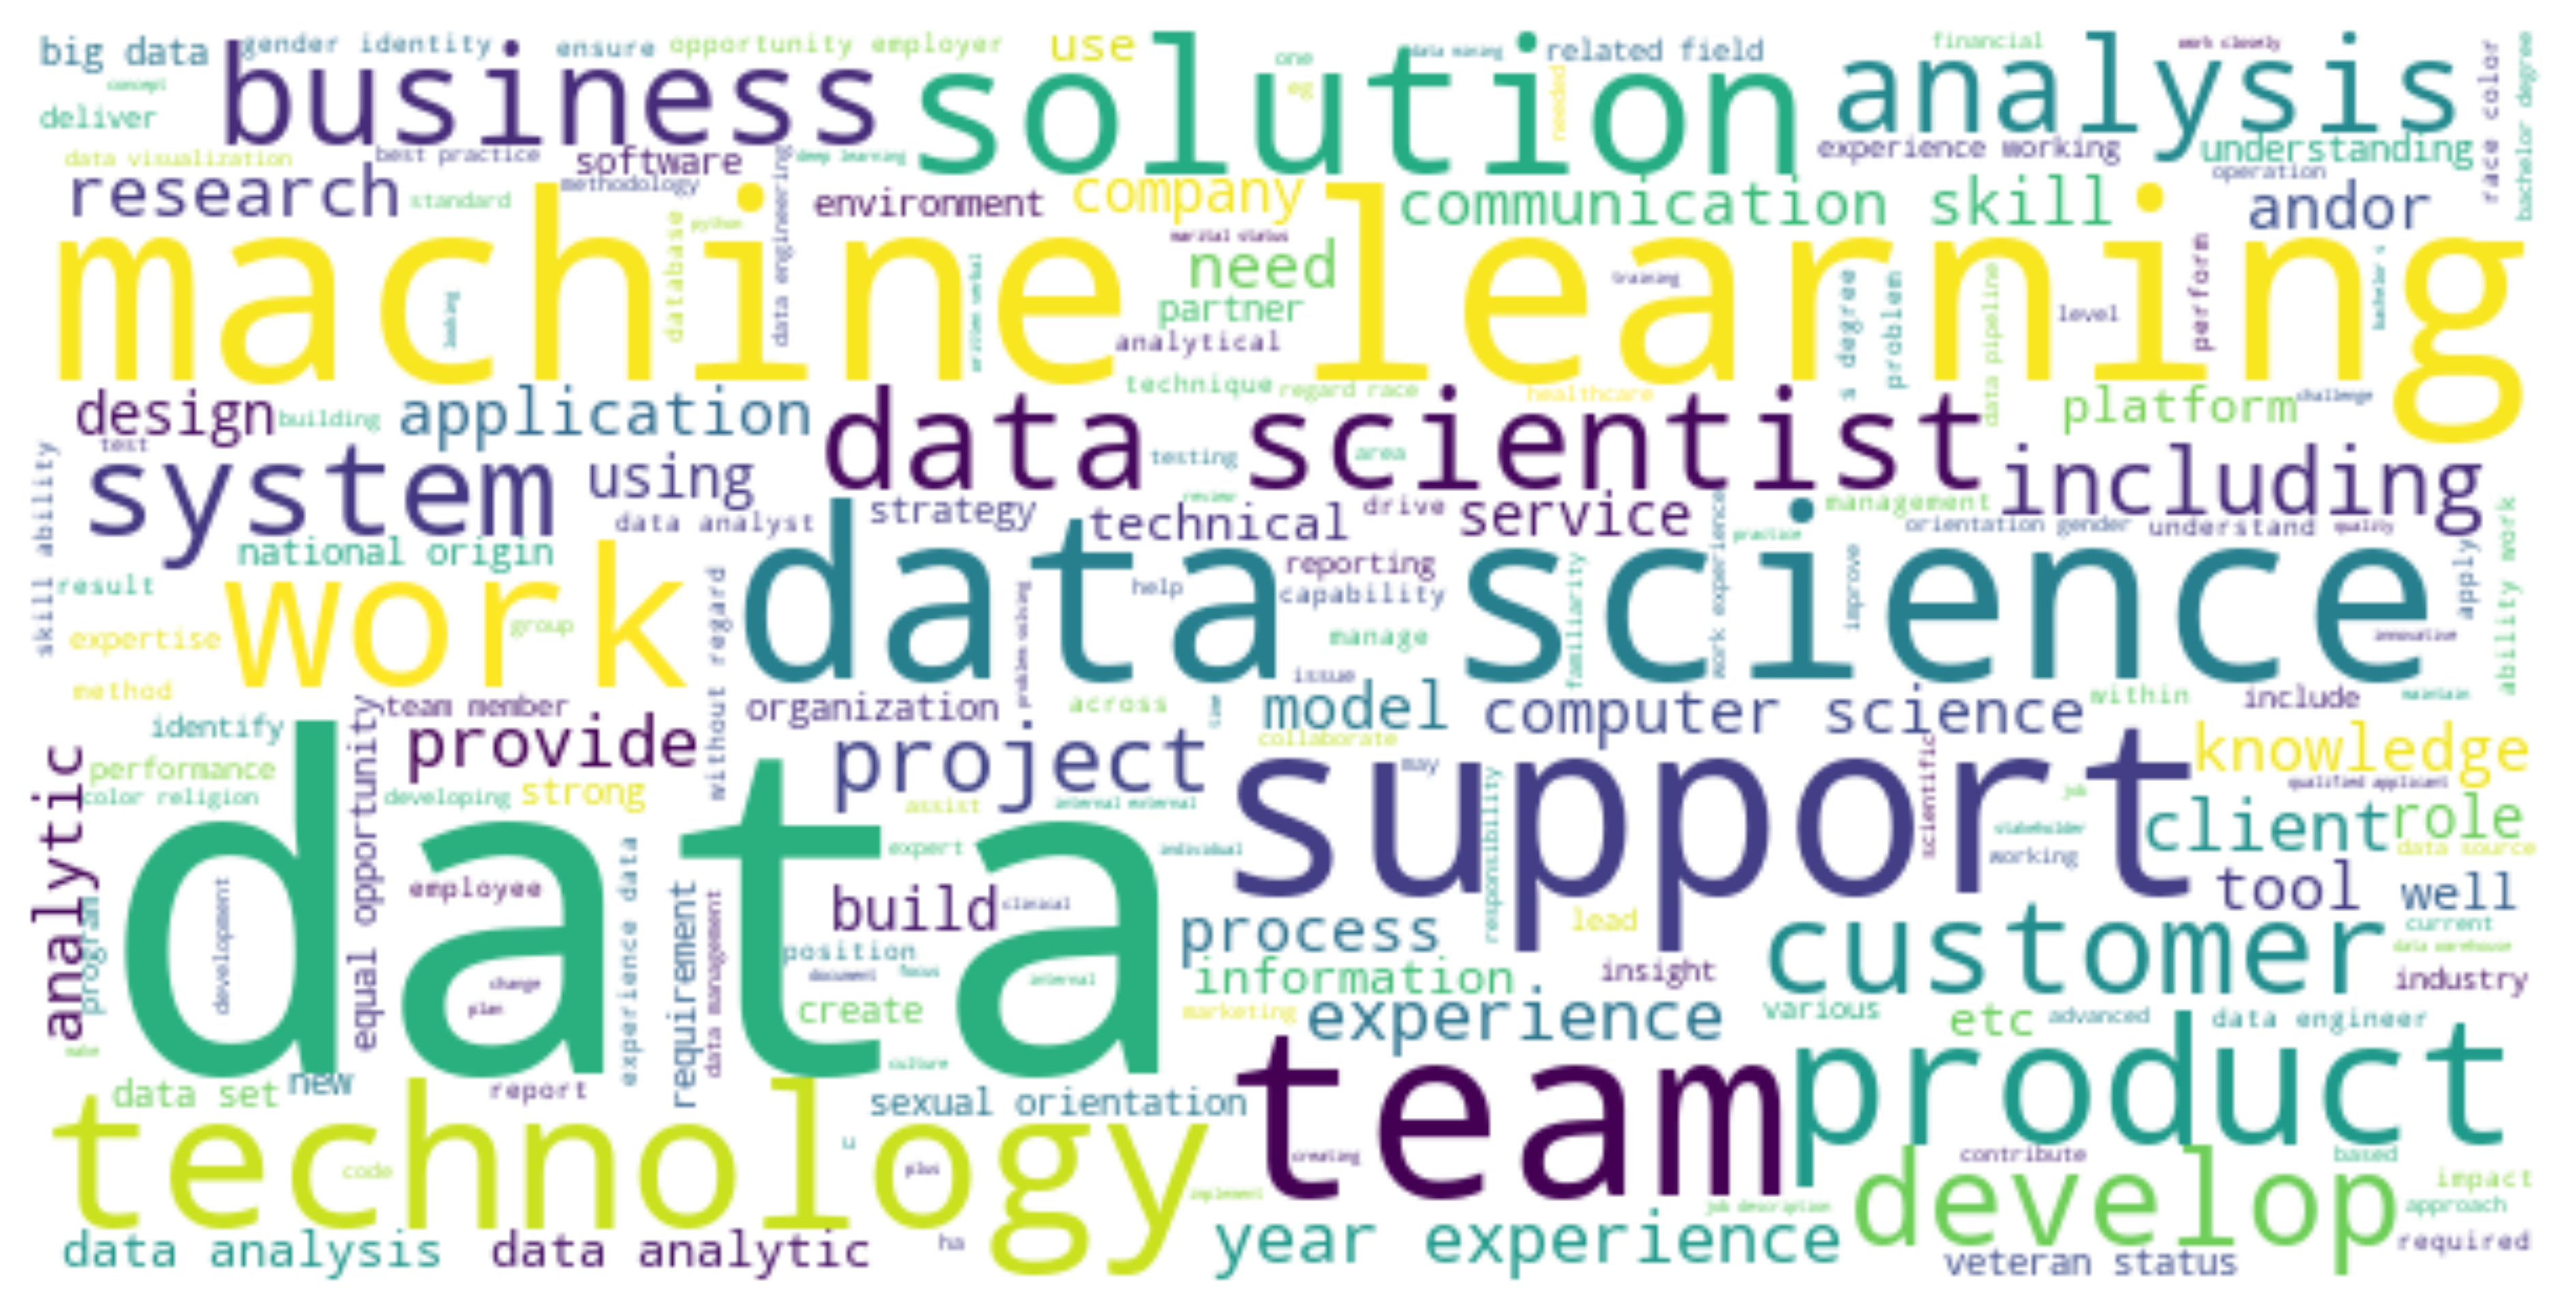

In [30]:
## passing the data to the wordcloud
wordcloud = WordCloud(width=600, height=300, random_state=21, max_font_size=110,background_color='white',max_words=500).generate(all_words)
## visualizing the data
plt.figure(figsize=(20, 6))
plt.imshow(wordcloud, interpolation="bilinear")
# Save the word cloud as an image file
# plt.savefig('wordcloud.png', dpi=300, bbox_inches='tight')
plt.axis('off')
plt.show()